# Análise exploratória de dados

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Importando os dados

In [28]:
names = ['Sexo', 'Comprimento', 'Diâmetro', 'Altura', 'Peso total', 'Peso sem casca', 'Peso do intestino', 'Peso da concha', 'Anéis']

In [29]:
# do diretorio da catherine
df = pd.read_csv(r"\Users\User\equipe-01\data\raw\abalone.csv", header=None, names=names)

In [30]:
df.head()

,Sexo,Comprimento,Diâmetro,Altura,Peso total,Peso sem casca,Peso do intestino,Peso da concha,Anéis
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 1. Descrição dos dados

## Dicionário

### Criando o dicionário

In [31]:
df_dict = {
    'sexo': {'descrição': ' sexo do molusco', 'tipo': ' qualitativo', 'subtipo': ' nominal'}, 
    'comprimento': {'descrição': ' tamanho máximo da concha (mm)', 'tipo': ' quantitativo', 'subtipo': ' contínuo'}, 
    'diâmetro': {'descrição':' medida perpendicular ao comprimento (mm)', 'tipo': ' qualitativo', 'subtipo': ' contínuo'}, 
    'altura': {'descrição':' altura total do molusco com casca (mm)', 'tipo': ' qualitativo', 'subtipo': ' contínuo'}, 
    'peso total': {'descrição':' peso total do molusco (g)', 'tipo': ' quantitativo', 'subtipo': ' contínuo'}, 
    'peso sem casca': {'descrição':' peso do molusco sem casca (g)', 'tipo': ' quantitativo', 'subtipo': ' contínuo'}, 
    'peso do intestino': {'descrição':' peso do intestino após sangrar (g)', 'tipo': ' quantitativo', 'subtipo': ' contínuo'},
    'peso da concha': {'descrição': ' peso da concha seca (g)', 'tipo': ' quantitativo', 'subtipo': ' contínuo'},
    'anéis': {'descrição': ' quantidade de anéis, +1.5 é a idade do abalone', 'tipo': ' quantitativo', 'subtipo': ' discreto' }
}

In [32]:
df_dict

{'sexo': {'descrição': ' sexo do molusco',
  'tipo': ' qualitativo',
  'subtipo': ' nominal'},
 'comprimento': {'descrição': ' tamanho máximo da concha (mm)',
  'tipo': ' quantitativo',
  'subtipo': ' contínuo'},
 'diâmetro': {'descrição': ' medida perpendicular ao comprimento (mm)',
  'tipo': ' qualitativo',
  'subtipo': ' contínuo'},
 'altura': {'descrição': ' altura total do molusco com casca (mm)',
  'tipo': ' qualitativo',
  'subtipo': ' contínuo'},
 'peso total': {'descrição': ' peso total do molusco (g)',
  'tipo': ' quantitativo',
  'subtipo': ' contínuo'},
 'peso sem casca': {'descrição': ' peso do molusco sem casca (g)',
  'tipo': ' quantitativo',
  'subtipo': ' contínuo'},
 'peso do intestino': {'descrição': ' peso do intestino após sangrar (g)',
  'tipo': ' quantitativo',
  'subtipo': ' contínuo'},
 'peso da concha': {'descrição': ' peso da concha seca (g)',
  'tipo': ' quantitativo',
  'subtipo': ' contínuo'},
 'anéis': {'descrição': ' quantidade de anéis, +1.5 é a idade d

### Salvando o dicionário como csv

In [33]:
directory = r'\Users\User\equipe-01\data\external'
csv_file = 'abalone_dict.csv'

#checando se o diretório existe
if not os.path.exists(directory):
    os.makedirs(directory)

csv_path = os.path.join(directory, csv_file)

with open(csv_path, 'w', newline='', encoding='utf-8') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Preditor', 'Descrição', 'Tipo', 'Subtipo'])
    for column, attributes in df_dict.items():
        csv_writer.writerow([column, attributes['descrição'], attributes['tipo'], attributes['subtipo']])

## 2. Perguntas de partida e hipóteses

1. Analisar estatísticas das variáveis.
2. Analisar para a relação entre sexo, idade, peso e altura.
3. Analisar a mudança de peso de acordo com o sexo e a idade.
4. Analisar as dimensões do abalone e o seu respectivo sexo.
5. Analisar a relação da altura com o respectivo sexo.

## Descrição dos dados e análise estatística das variáveis

Funções úteis

In [34]:
def IQR_range(data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    return IQR

def interval(data):
    return data.max() - data.min()

def central_tendency_measurement(data):
    print(f'Mean:', data.mean().round(3))
    print(f'Median:', data.median().round(3))
    print(f'Mode:', data.mode().tolist())

def dispersion_measurements(data):
    print(f'Standard Deviation:', data.std().round(3))
    print(f'Interquartile range:', IQR_range(data).round(3))
    print(f'Interval:', interval(data))
    
def get_qual_mode(data):
    mode = data.value_counts().to_frame(name='count')
    mode_idx = mode['count'].idxmax()
    print(f'Mode:', mode_idx, ' Count:', mode['count'].loc[mode_idx])

Inicialmente, buscamos entender os dados e confirmar as informações armazenadas no dicionário

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sexo               4177 non-null   object 
 1   Comprimento        4177 non-null   float64
 2   Diâmetro           4177 non-null   float64
 3   Altura             4177 non-null   float64
 4   Peso total         4177 non-null   float64
 5   Peso sem casca     4177 non-null   float64
 6   Peso do intestino  4177 non-null   float64
 7   Peso da concha     4177 non-null   float64
 8   Anéis              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Desse modo, percebe-se que as 4177 amostras não-nulas possuem 8 variáveis quantitativas e 1 qualitativa, como descrito no dicionário.

Em seguida, confere-se se há valores faltantes.

In [36]:
df.isna().sum()

Sexo                 0
Comprimento          0
Diâmetro             0
Altura               0
Peso total           0
Peso sem casca       0
Peso do intestino    0
Peso da concha       0
Anéis                0
dtype: int64

Percebe-se que não há valores faltantes. Logo, nesse conjunto de dados, técnicas de preenchimento de dados faltantes não serão necessárias.

### Descrição dos dados quantitativos

In [37]:
df.describe()

,Comprimento,Diâmetro,Altura,Peso total,Peso sem casca,Peso do intestino,Peso da concha,Anéis
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Agora, uma descrição individualizada de cada preditor, considerando medidas de tendência central e medidas de dispersão

#### Medidas de Tendência Central

In [38]:
for col in df.columns:
    if df[col].dtype  != object:
        print(col, ': ')
        central_tendency_measurement(df[col])
        print(' ')

Comprimento : 
Mean: 0.524
Median: 0.545
Mode: [0.55, 0.625]
 
Diâmetro : 
Mean: 0.408
Median: 0.425
Mode: [0.45]
 
Altura : 
Mean: 0.14
Median: 0.14
Mode: [0.15]
 
Peso total : 
Mean: 0.829
Median: 0.8
Mode: [0.2225]
 
Peso sem casca : 
Mean: 0.359
Median: 0.336
Mode: [0.175]
 
Peso do intestino : 
Mean: 0.181
Median: 0.171
Mode: [0.1715]
 
Peso da concha : 
Mean: 0.239
Median: 0.234
Mode: [0.275]
 
Anéis : 
Mean: 9.934
Median: 9.0
Mode: [9]
 


#### Medidas de Dispersão  

In [39]:
for col in df.columns:
    if df[col].dtype  != object:
        print(col, ': ')
        dispersion_measurements(df[col])
        print(' ')

Comprimento : 
Standard Deviation: 0.12
Interquartile range: 0.165
Interval: 0.74
 
Diâmetro : 
Standard Deviation: 0.099
Interquartile range: 0.13
Interval: 0.595
 
Altura : 
Standard Deviation: 0.042
Interquartile range: 0.05
Interval: 1.13
 
Peso total : 
Standard Deviation: 0.49
Interquartile range: 0.712
Interval: 2.8235
 
Peso sem casca : 
Standard Deviation: 0.222
Interquartile range: 0.316
Interval: 1.487
 
Peso do intestino : 
Standard Deviation: 0.11
Interquartile range: 0.16
Interval: 0.7595000000000001
 
Peso da concha : 
Standard Deviation: 0.139
Interquartile range: 0.199
Interval: 1.0034999999999998
 
Anéis : 
Standard Deviation: 3.224
Interquartile range: 3.0
Interval: 28
 


Percebe-se que as medidas quantitativas calculadas "na mão" e com o .describe() trazem saídas bem parecidas, confirmando que as funções implementadas trazem informações corretas sobre os dados.

### Descrição dos dados Qualitativos

Novamente, utilizando o .describe() para ter uma visão geral dos dados

In [40]:
qualitative_columns = df.select_dtypes(include='object')
qualitative_columns.describe()

,Sexo
count,4177
unique,3
top,M
freq,1528


Agora, com uma função pronta

In [41]:
for col in df.columns:
    if df[col].dtype == object:
        print(col, ': ')
        get_qual_mode(df[col])
        print(' ')

Sexo : 
Mode: M  Count: 1528
 


Percebe-se, novamente a confirmação de que as funções implementadas são confiáveis

### Matriz de correlação 

Aplicando encoder nos dados. Should I really encode them?

Considerando apenas dados quantitativos

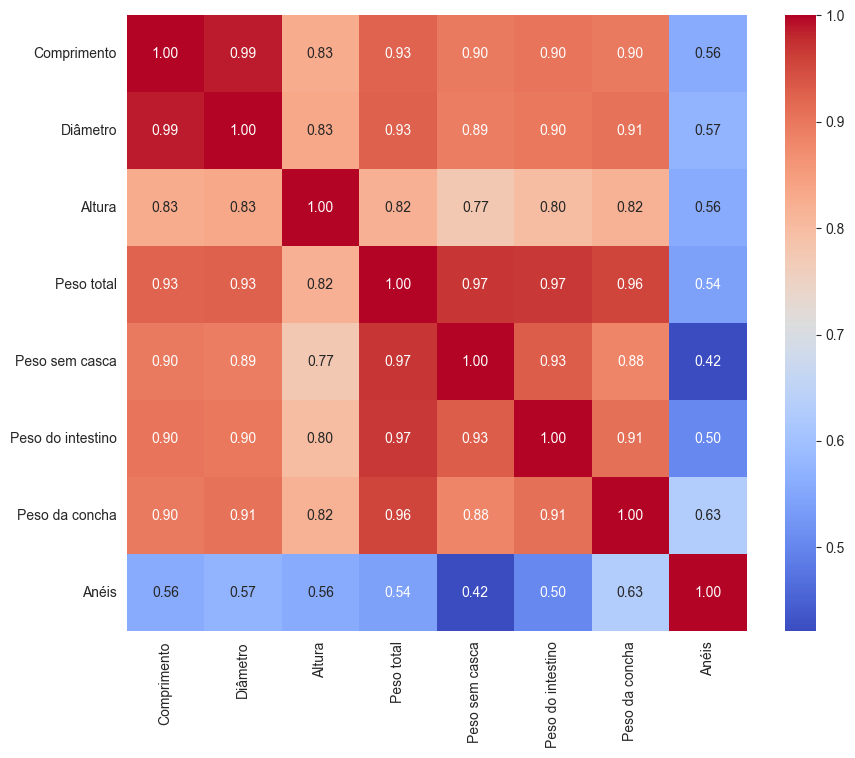

In [42]:
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_quant = df[quantitative_columns]

corr = df_quant.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Percebe-se que os preditores estão muito correlacionados entre si, mas em valores menores com a saída.

### Plotando algumas relações estatísticas entre os dados

In [43]:
sns.set_style('whitegrid')

#### Conjunto de dados todo

##### Histogramas

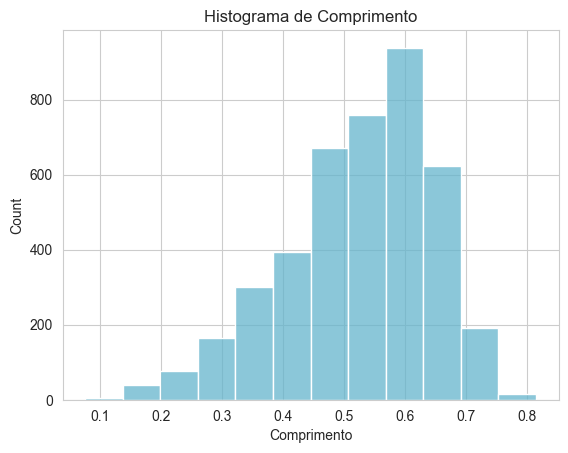

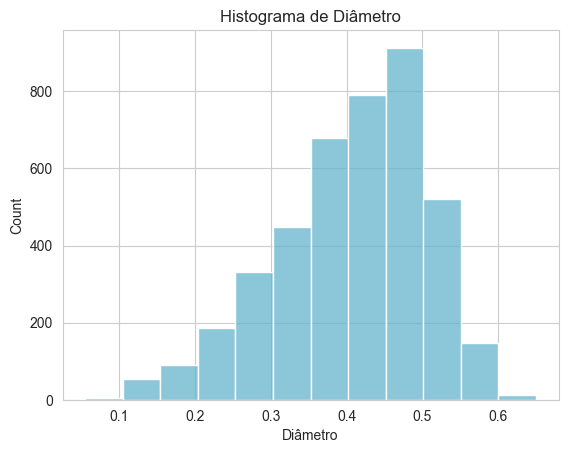

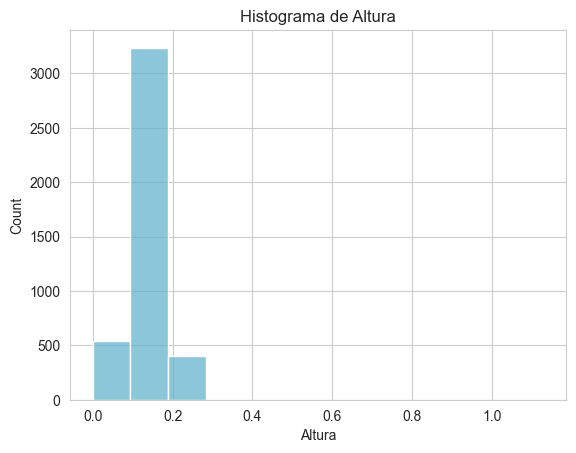

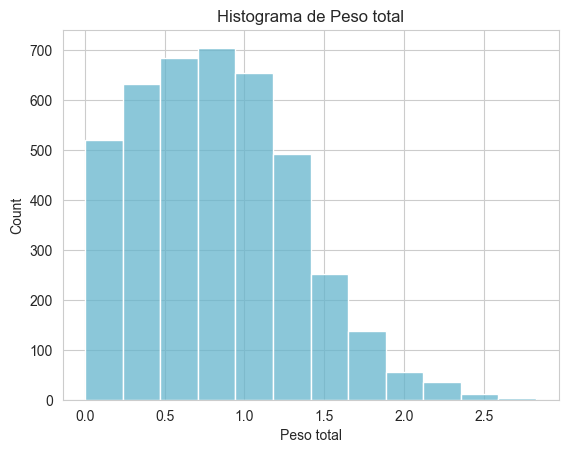

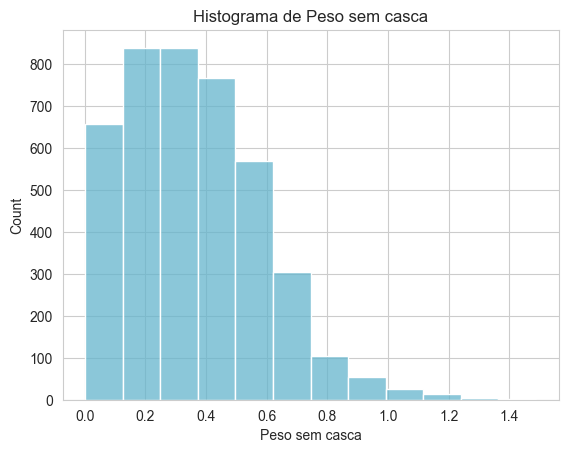

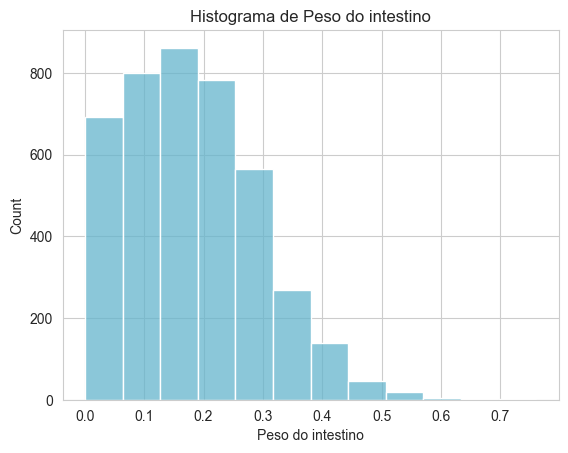

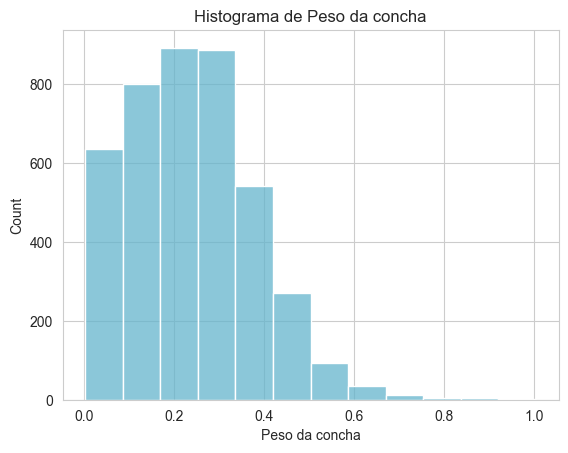

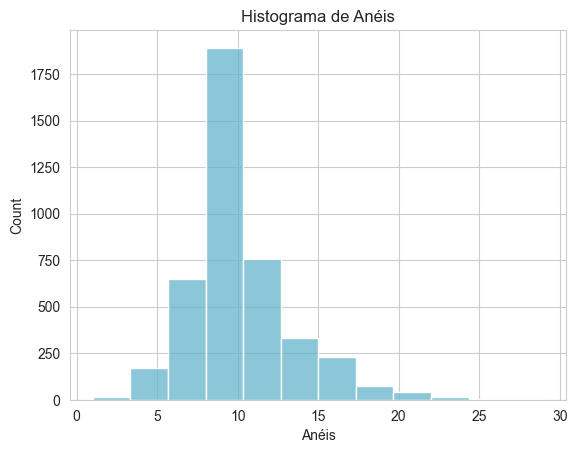

In [48]:
for col in df.columns:
    if df[col].dtype != object:
        sns.histplot(df[col], color='#64b5cd', bins=12)
        plt.title(f'Histograma de {col}')
        plt.show()

##### Box-plots

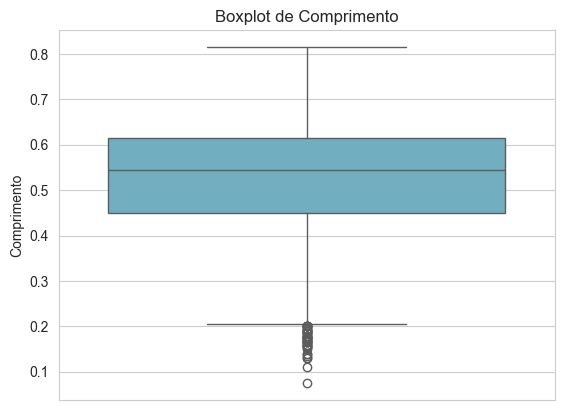

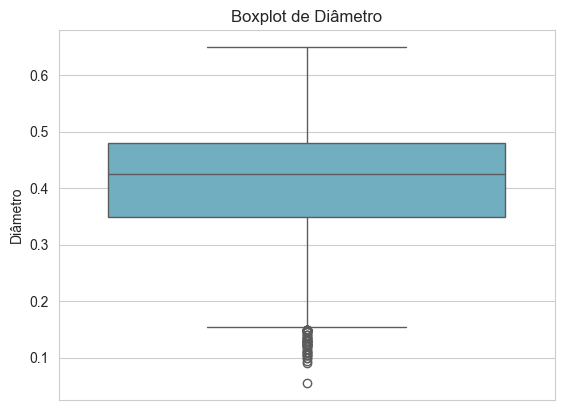

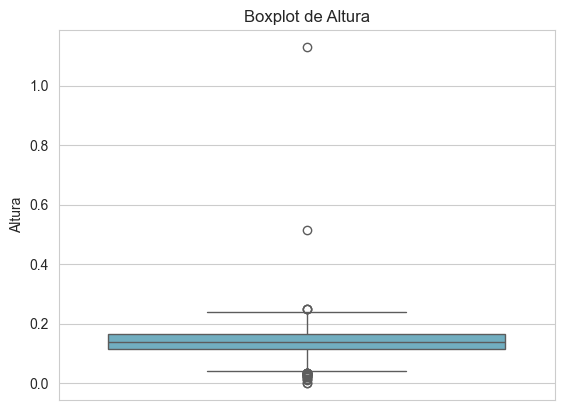

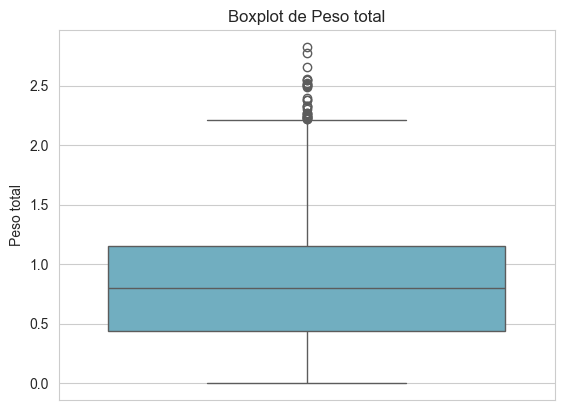

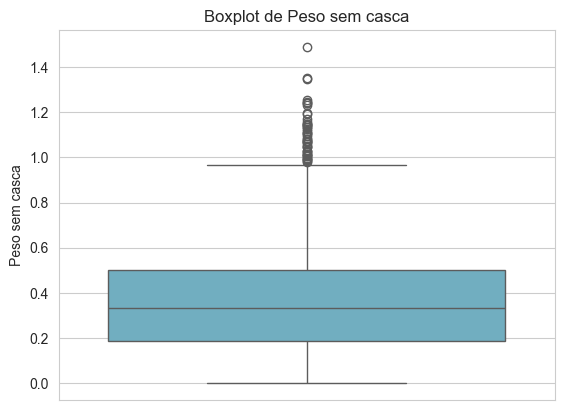

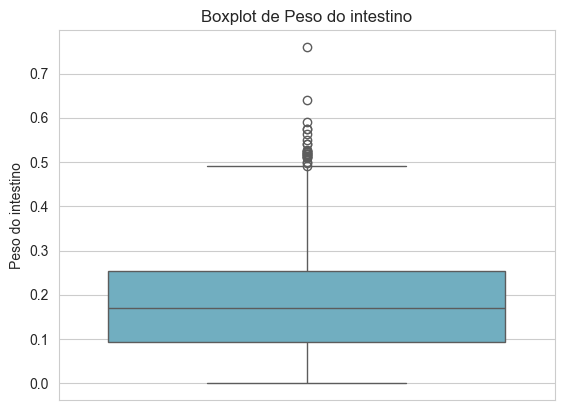

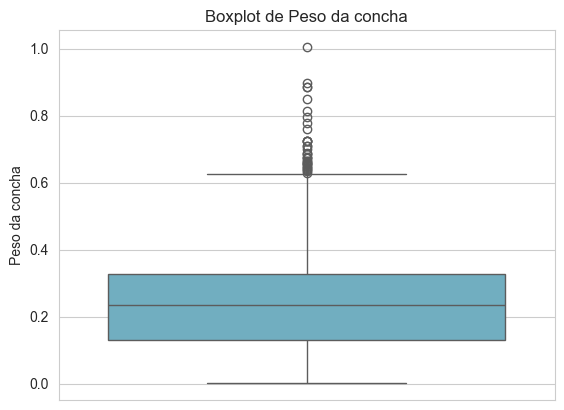

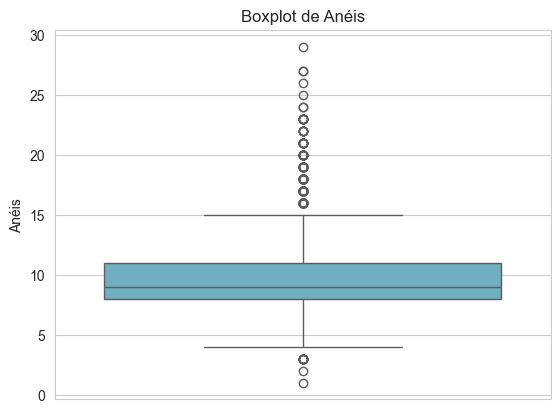

In [45]:
for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(df[col], color='#64b5cd')
        plt.title(f'Boxplot de {col}')
        plt.show()

##### Gráfico de Barras

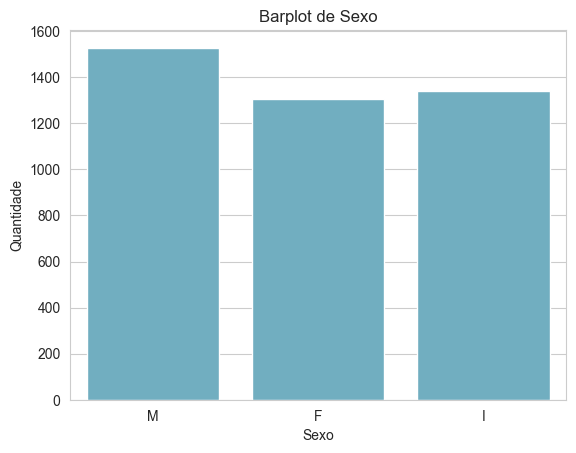

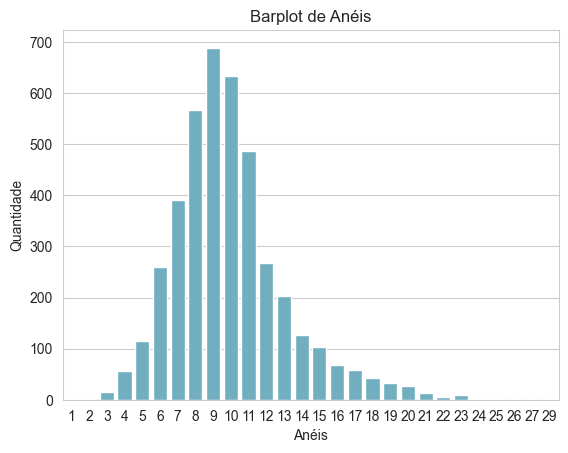

In [53]:
for col in df.columns:
    if df[col].dtype != float:
        sns.countplot(df, x=col, color='#64b5cd')
        plt.ylabel('Quantidade')
        plt.title(f'Barplot de {col}')
        plt.show()

#### Conjunto de dados separado por sexo

##### Histograma 

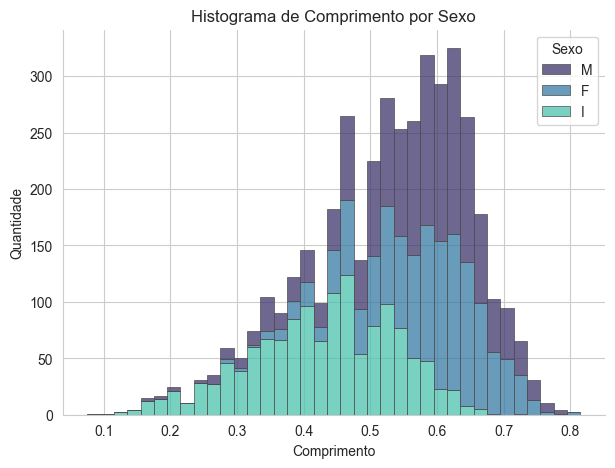

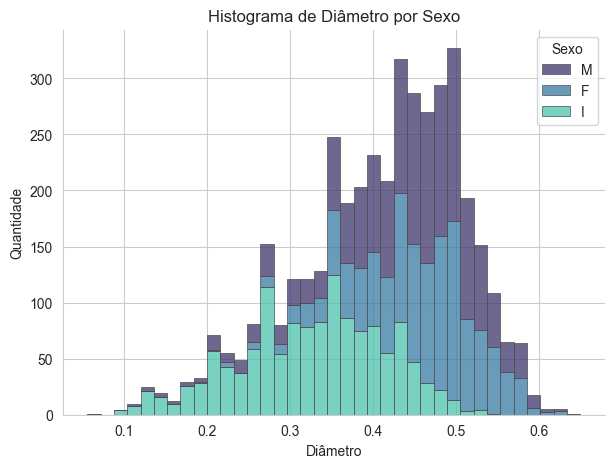

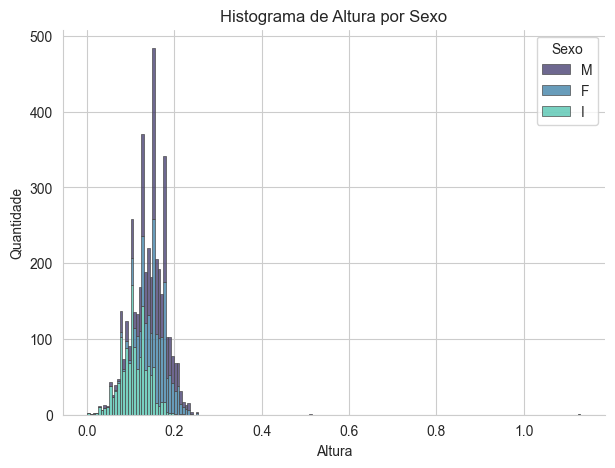

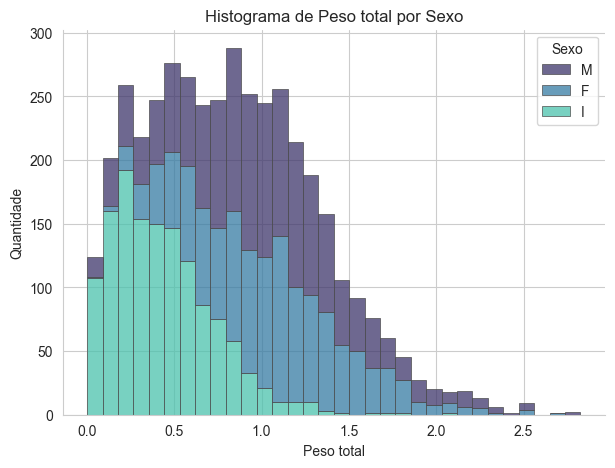

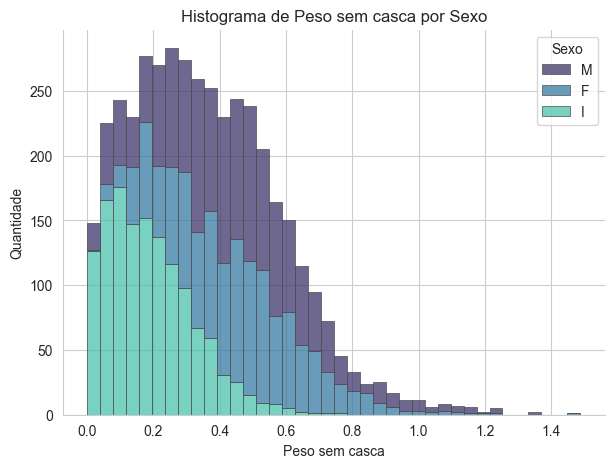

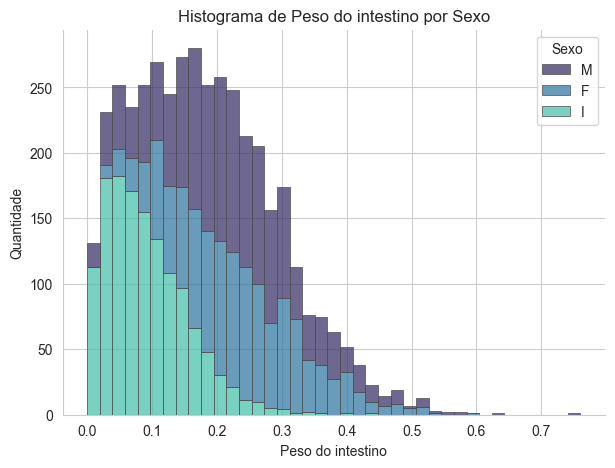

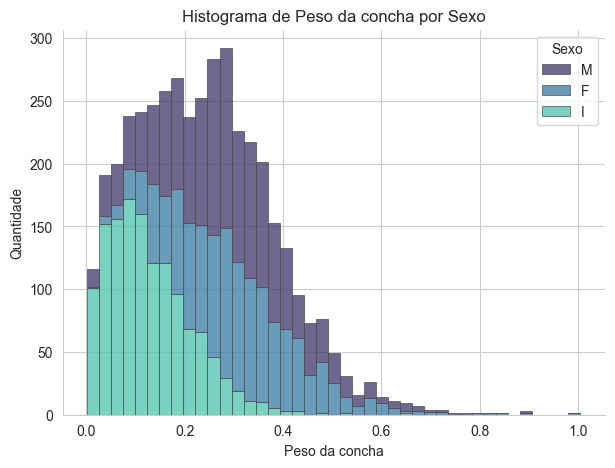

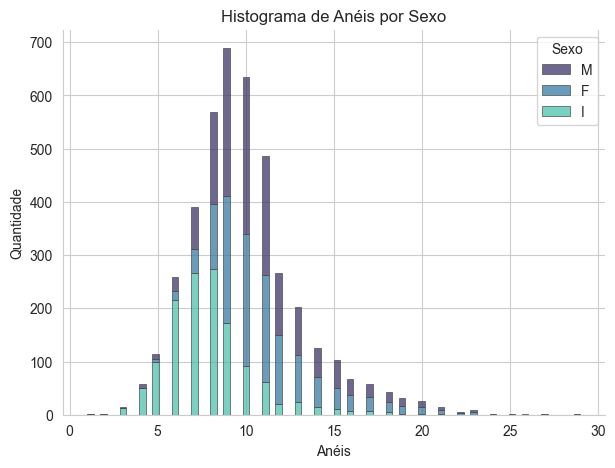

In [54]:
for col in df.columns:
    if df[col].dtype != object:
        f, ax = plt.subplots(figsize=(7, 5))
        sns.despine(f)

        sns.histplot(
        df,
        x=col, hue="Sexo",
        multiple="stack",
        palette="mako",
        edgecolor=".3",
        linewidth=.5
        )
        plt.ylabel('Quantidade')
        plt.title(f'Histograma de {col} por Sexo')

Com esses histogramas, é possível analisar a distribuição das variáveis a depender do sexo (variável qualitativa), conseguindo entender melhor como as características dos abalone se distribuem a depender do sexo.

##### Boxplot

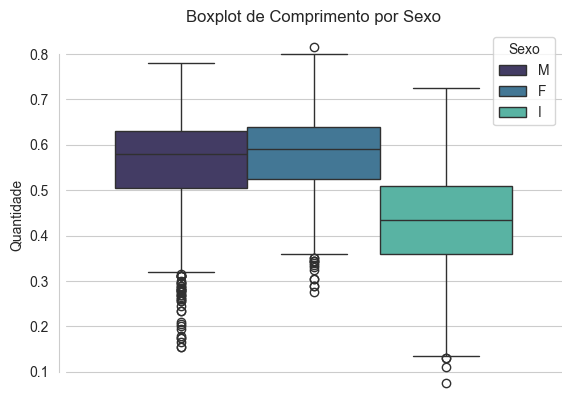

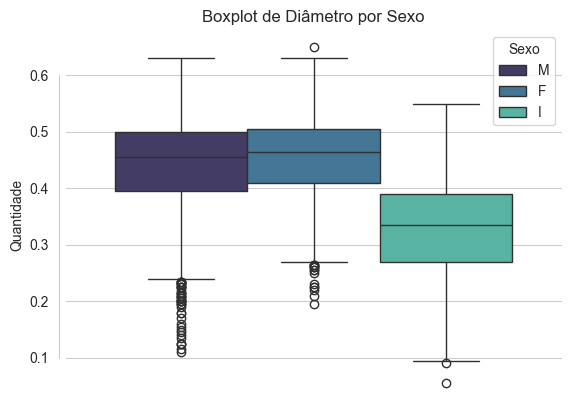

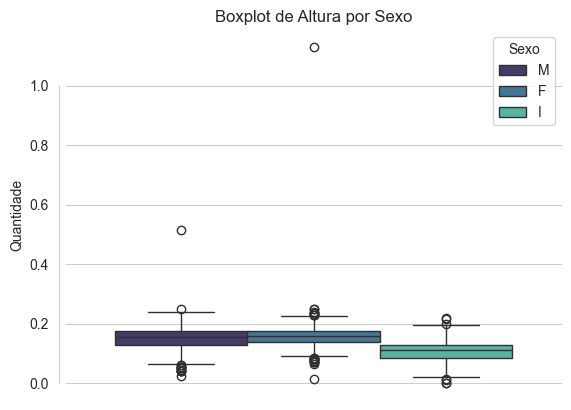

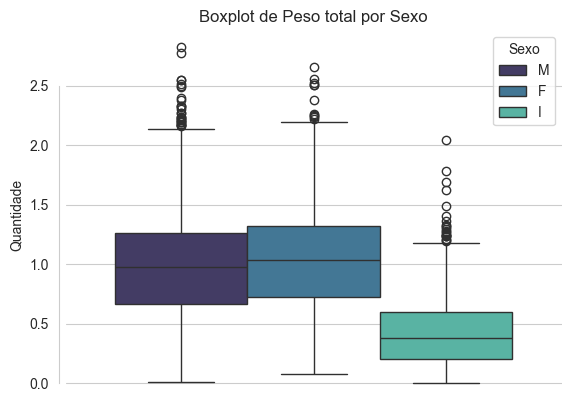

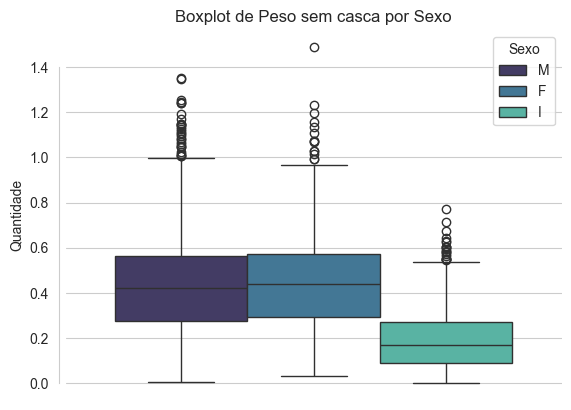

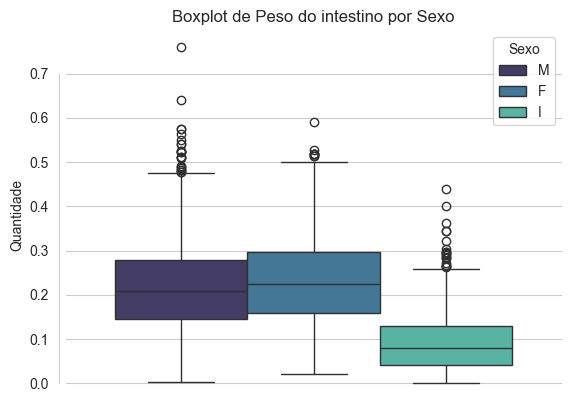

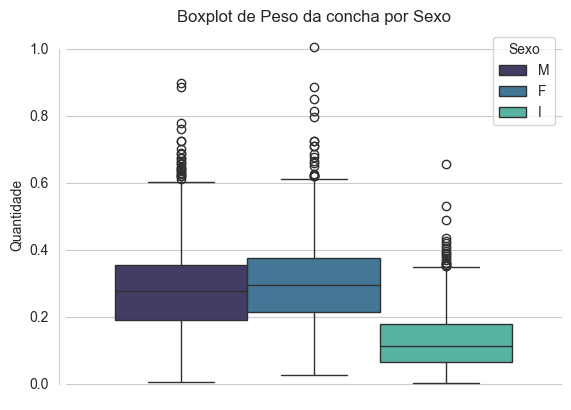

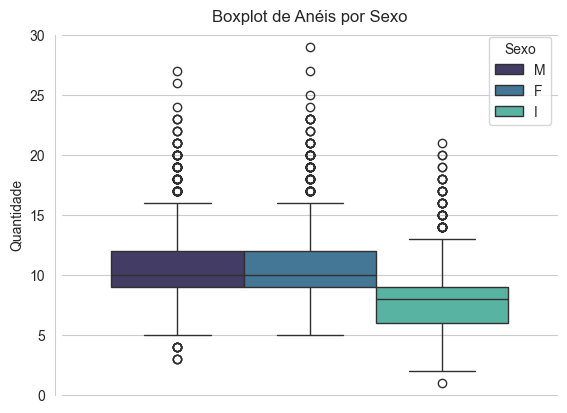

In [58]:
for col in df.columns:
    if df[col].dtype != object:
        sns.boxplot(y=col, hue="Sexo", palette="mako", data=df)
        sns.despine(offset=5, trim=True)
        plt.ylabel('Quantidade')
        plt.title(f'Boxplot de {col} por Sexo')
        plt.show()

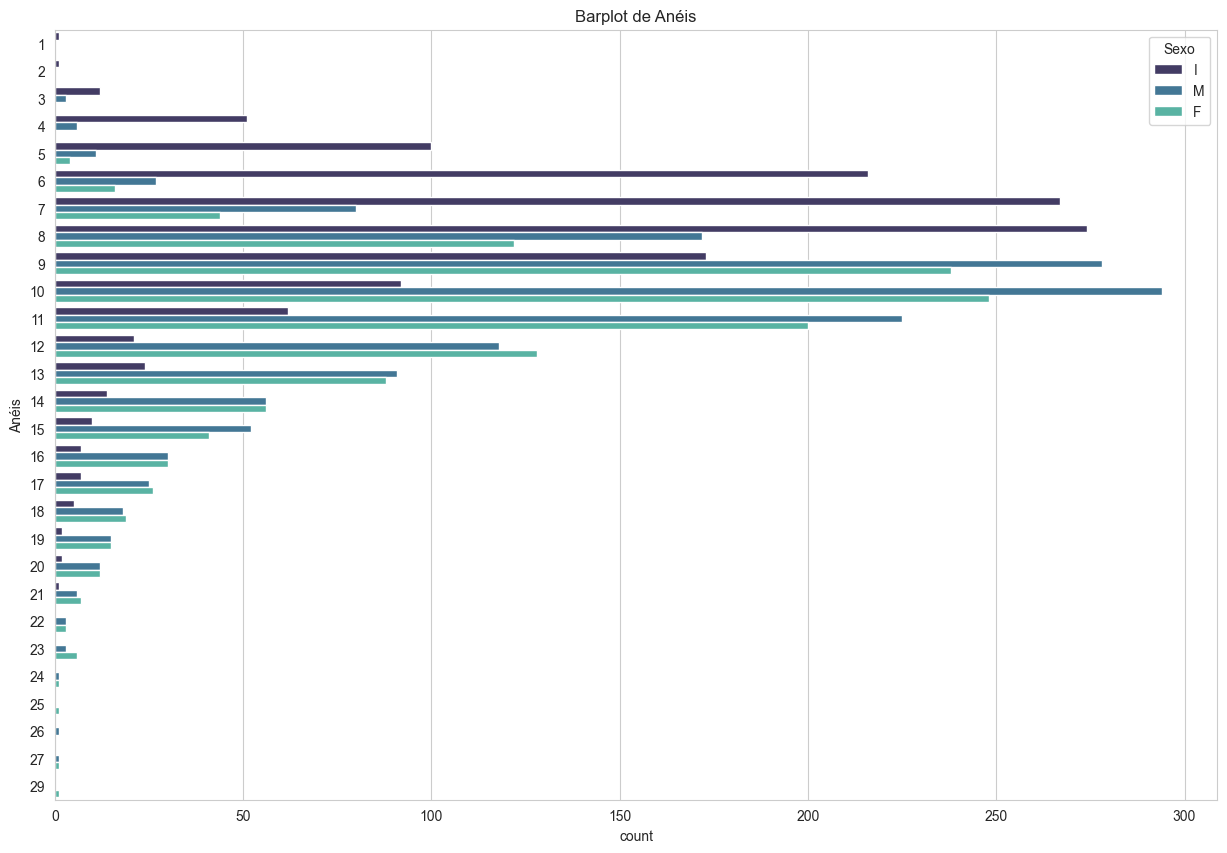

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(df, y="Anéis",hue="Sexo", palette="mako")
plt.title(f'Barplot de Anéis')
plt.show()

### Paiplot para ver relações entre variáveis

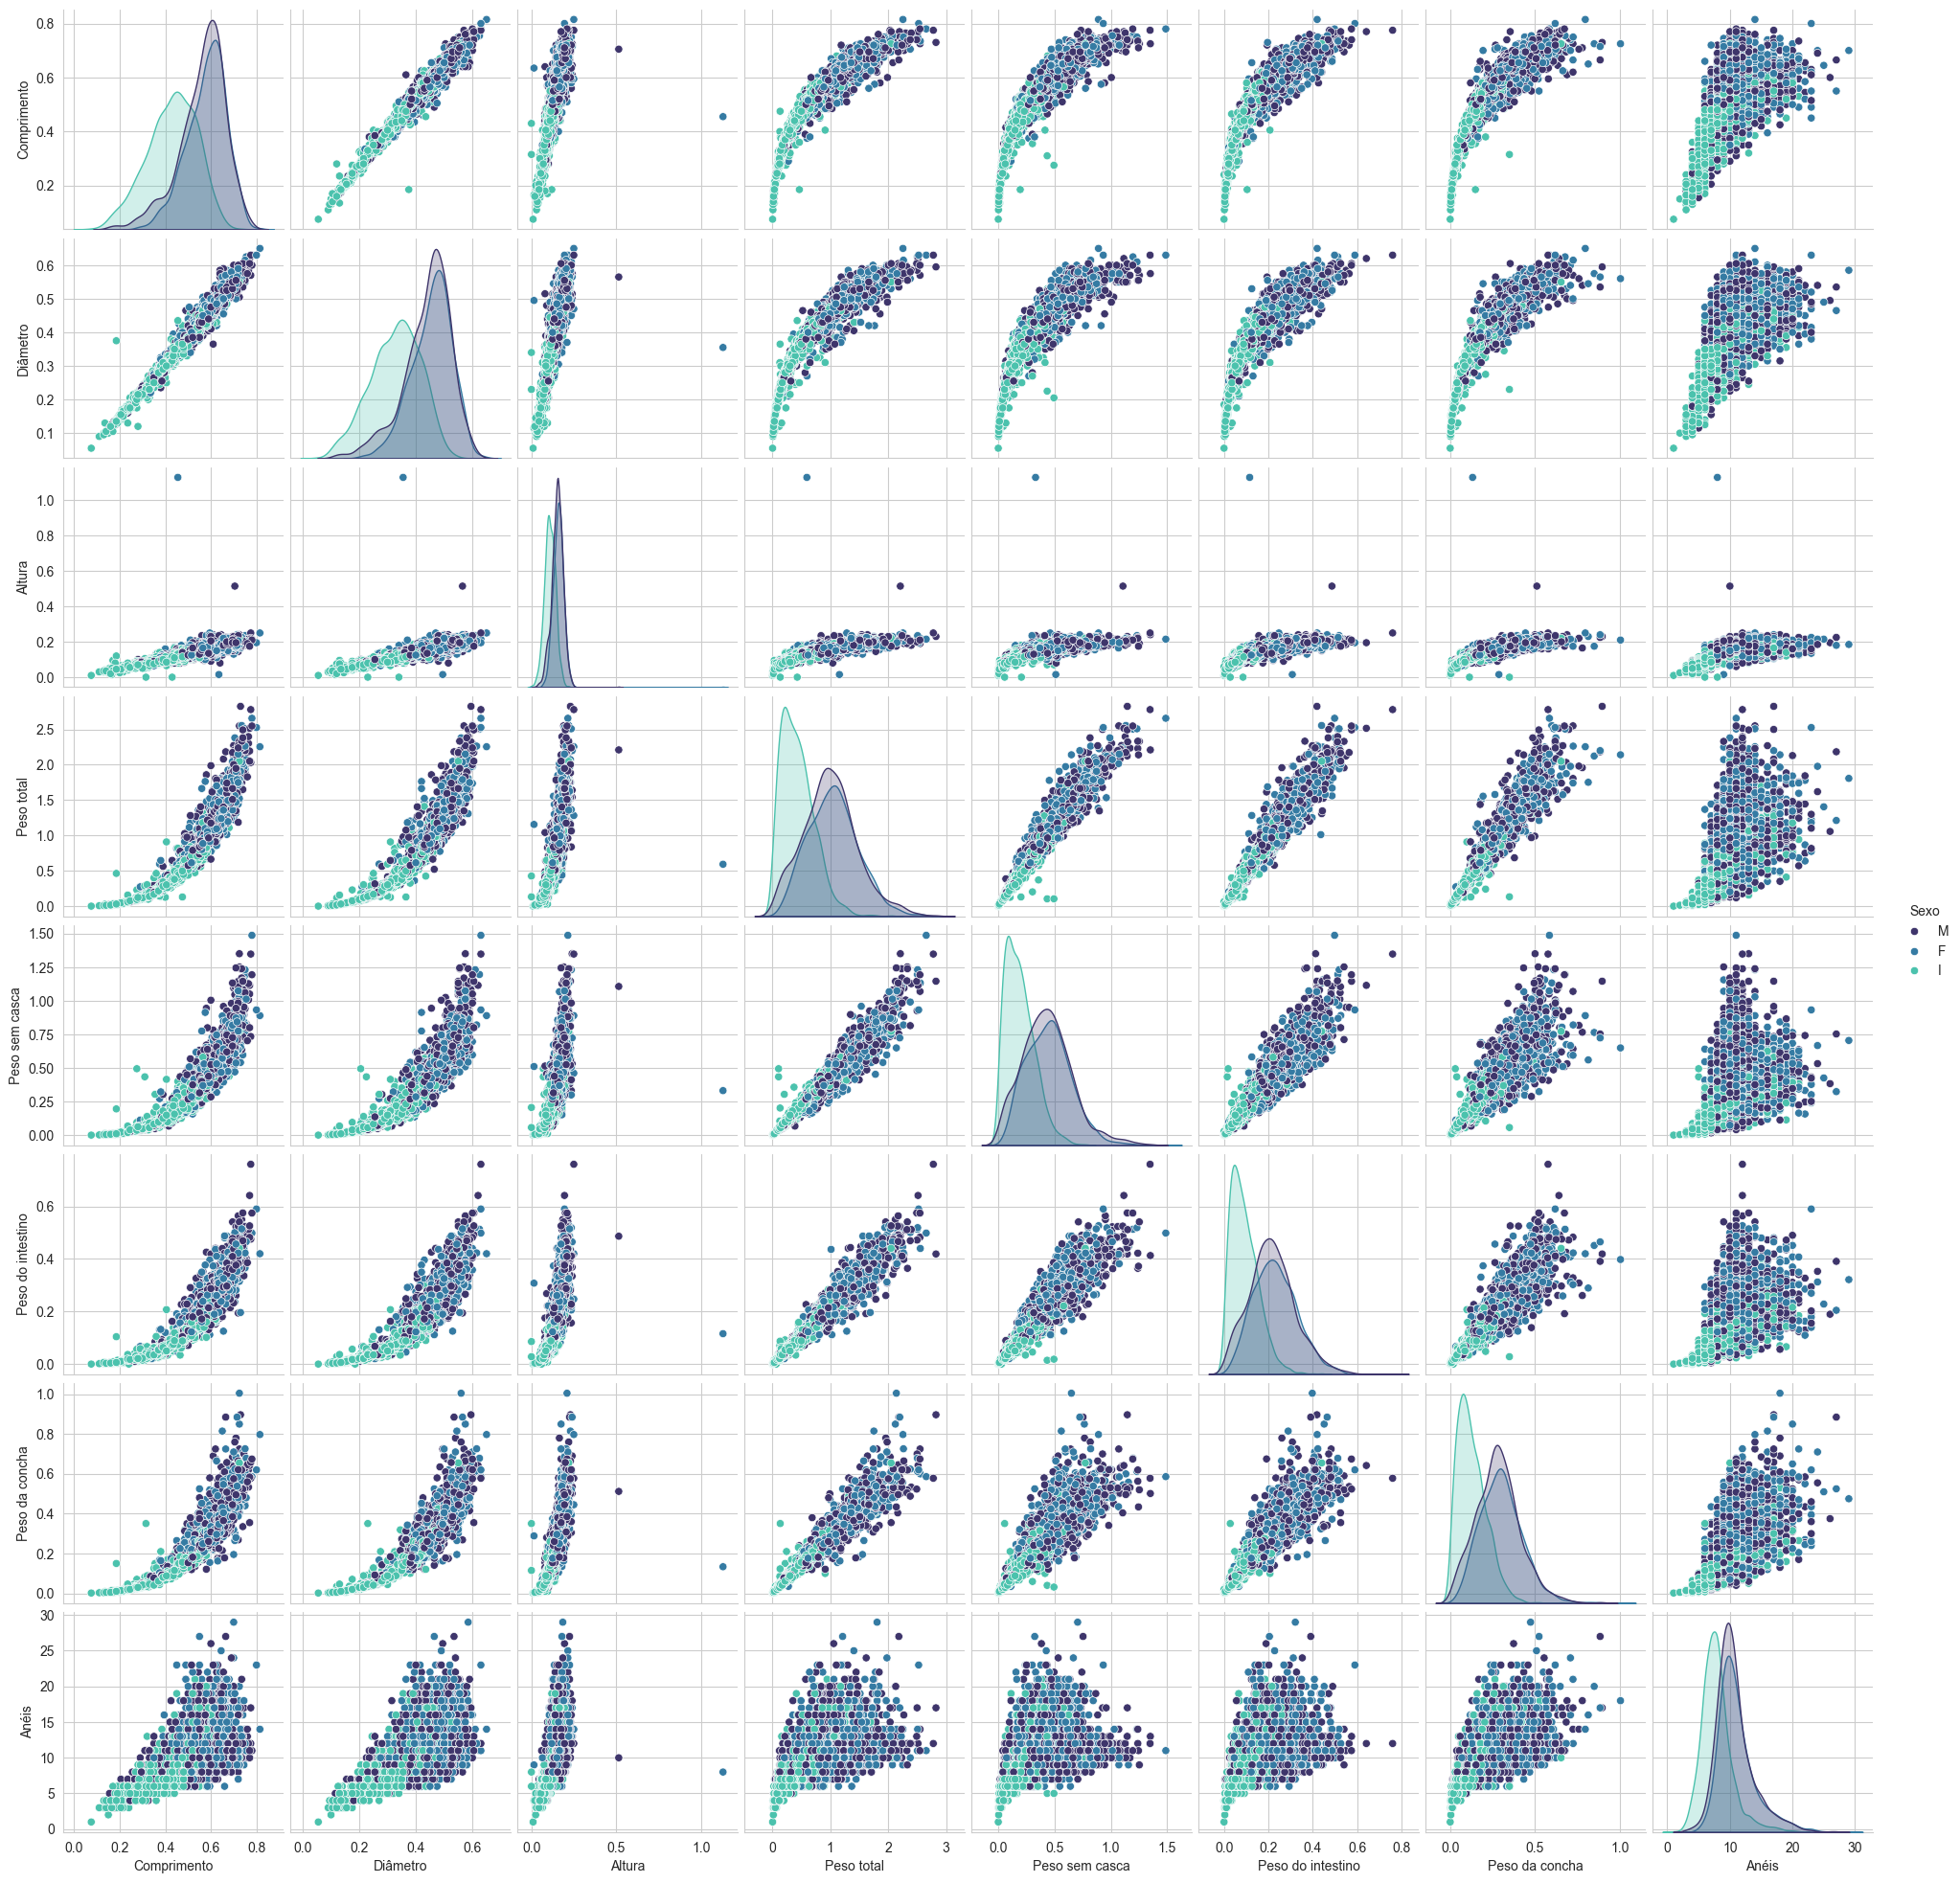

In [57]:
sns.pairplot(df, hue="Sexo", palette="mako")


## 3. Insights

## Medidas Estatísticas

Pode-se obter, após calcular as medidas estatísticas, as médidas de tendência central e de dispersão dos preditores quantitativos e algumas informações dos preditores qualitativos. Ademais, com o auxílio de gráficos, consegue-se visualizar como os preditores se distribuem, compreendendo melhor o intervalo em que seus dados estão mais concentrados, por exemplo. Por fim, considerando a variável qualitativa "Sexo" dos Abalones como critério de análise, é possível analisar como se caracteriza cada sexo do molusco.